# <center> Практические задания по цифровой обработке сигналов </center>
# <center> Первая лабораторная работа </center>


В данной работе Вы познакомитесь с основными методами работы с аудиоданными в Python. Разбересь в том, как работает свертка, и примените пару интересных фильтров.

# Задание 1. Работа с аудиофайлами в Python (1 балл)

## Теория

Звук - это аналоговый сигнал. То есть он является непрерывным по времени и по значениям. Для того, чтобы работать со звуком на цифровом устройстве, надо преобразовать его в цифровое представление. Для этого надо разделить непрерывный сигнал на промежутки времени (дискретизация сигнала) и разбить непрерывные значения на интервалы (квантование сигнала). Выбраные параметры дискретизации и квантования сигнала напрямую влияют на качество цифрового сигнала. 

<!-- 
## Практика

1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла? 

2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?   

3. Чем .wav отличается от других кодеков, например .mp3 или .ogg? -->


<!-- ### Подсказка

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib. -->

In [57]:
import matplotlib.pyplot as plt 
import numpy as np
import scipy
%matplotlib inline

### 1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла?

В wave файле содержится:
- Заголовок
- Область с данными
Можно узнать параметры дискретизации и квантования, загрузив его с Python с помощью встроенное библиотеки:


In [56]:
from scipy.io import wavfile

sample_rate, data = wavfile.read('recording1.wav')
bit_rate = data.dtype.itemsize * 8

print(f'Параметр дискретизации = {sample_rate} Гц')
print(f'Параметр квантования = {bit_rate} бит')

Параметр дискретизации = 44100 Гц
Параметр квантования = 16 бит


### 2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?

**Подсказка**

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from IPython.display import Audio

sample_rate, audio = wavfile.read('recording1.wav')
audio = audio.mean(axis=1)

## Напишем фунцию для изменения частоты дискретизации
def resample_audio(audio, original_sr, target_sr):
    n_samples = len(audio) * target_sr // original_sr
    resampled = signal.resample(audio, n_samples)
    return resampled

## Зададим параметры дискретизации
sample_rates = [16000, 8000, 4000, 2000, 1000, 500]
resampled_audios = {}

## Применим получившуюся функцию к нашему сигналу
for sr in sample_rates:
    resampled_audios[sr] = resample_audio(audio, sample_rate, sr)


Визуализируем форму волны:

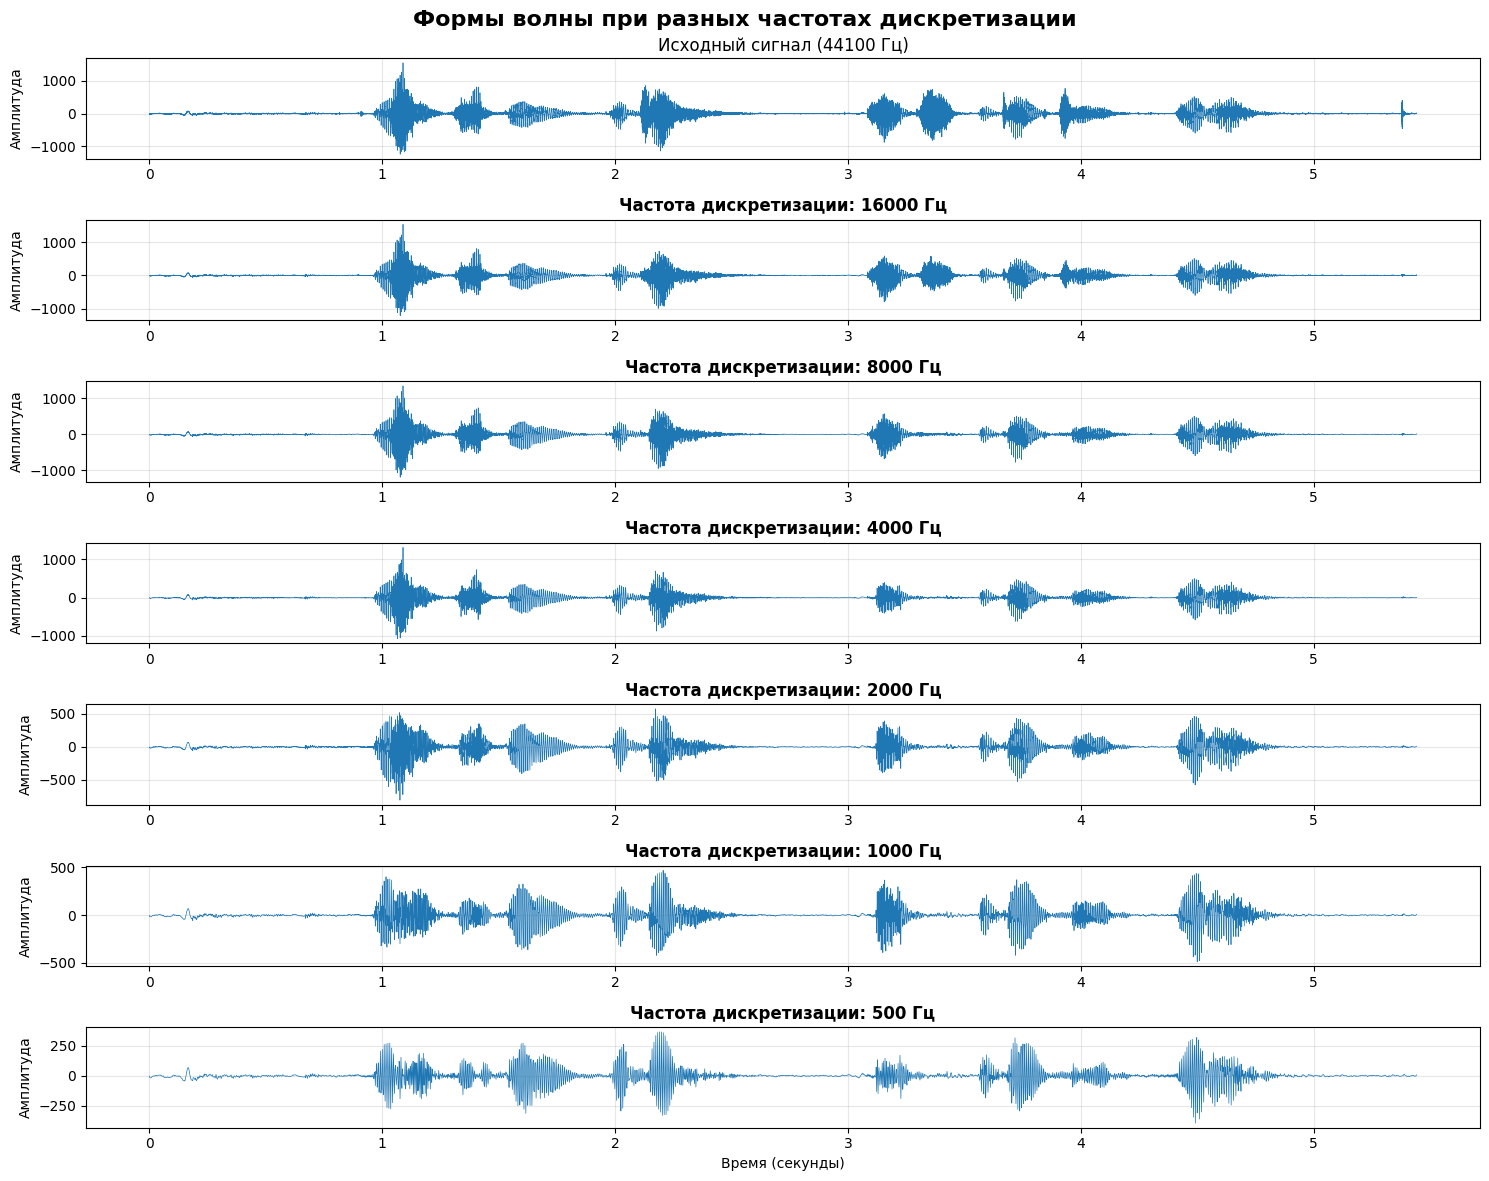

In [4]:
fig, axes = plt.subplots(len(sample_rates) + 1, 1, figsize=(15, 12))
fig.suptitle('Формы волны при разных частотах дискретизации', fontsize=16, fontweight='bold')

time_original = np.linspace(0, len(audio) / sample_rate, len(audio))
axes[0].plot(time_original, audio, linewidth=0.5)
axes[0].set_title(f'Исходный сигнал ({sample_rate} Гц)')
axes[0].set_ylabel('Амплитуда')
axes[0].grid(True, alpha=0.3)

for idx, sr in enumerate(sample_rates, 1):
    time = np.linspace(0, len(resampled_audios[sr]) / sr, len(resampled_audios[sr]))
    axes[idx].plot(time, resampled_audios[sr], linewidth=0.5)
    axes[idx].set_title(f'Частота дискретизации: {sr} Гц', fontweight='bold')
    axes[idx].set_ylabel('Амплитуда')
    axes[idx].grid(True, alpha=0.3)

axes[-1].set_xlabel('Время (секунды)')
plt.tight_layout()

Воспроизведем получившиеся сигналы:

In [5]:
print(sample_rate)

44100


In [6]:
display(Audio(audio, rate=sample_rate, normalize=True))

for sr in sample_rates:
    print(f"\nЧастота дискретизации: {sr} Гц")
    display(Audio(resampled_audios[sr], rate=sr, normalize=True))


Частота дискретизации: 16000 Гц



Частота дискретизации: 8000 Гц



Частота дискретизации: 4000 Гц



Частота дискретизации: 2000 Гц



Частота дискретизации: 1000 Гц



Частота дискретизации: 500 Гц


Результаты эксперимента:

16000 Гц - отличное качество, речь полностью разборчива
8000 Гц - хорошее качество, речь разборчива  
4000 Гц - заметная потеря качества, но речь еще можно понять
2000 Гц - не воспроизводится в браузере (ниже минимума Web Audio API)
1000 Гц - не воспроизводится в браузере
500 Гц - не воспроизводится в браузере

### 3. Чем .wav отличается от других кодеков, например .mp3 или .ogg?

wav — это несжатый формат аудио. Он хранит звук в исходном качестве без потерь данных
mp3 и ogg — это сжатые форматы с потерями, которые уменьшают размер файла за счет удаления части аудиоинформации.

# Задание 2. Гармонические сигналы (1 балл)

## Теория
[Гармонические колебания](https://ru.wikipedia.org/wiki/Гармонические_колебания) -  колебания, при которых физическая величина изменяется с течением времени по гармоническому (синусоидальному/косинусоидальному) закону. 

В общем случае гармонические колебания задаются формулой:

$$y=A \cos(\omega t+\varphi_0)$$

где $А$ - это амплитуда, $\omega$ – циклическая частота (радиан/с), $\varphi$ - фаза (сдвиг), $t$ – время. 


In [3]:
# Сначала определим функцию для отрисовки сигнала с хорошим масштабом и сеткой
# Это поможет легче анализировать сигнал
def draw_signal(data, figsize=(14, 14)):
    plt.figure(figsize=figsize)
    plt.plot(data, linewidth=2)
    plt.minorticks_on()
    plt.xticks(np.arange(0, 1000, step=100))
    plt.yticks(np.arange((data.min().round())//10*10, 
                         (data.max().round())//10*10+10, step=5))
    plt.grid(which='major',
        color = 'k', 
        linewidth = 1)
    plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
    plt.show()

In [4]:
# Читаем данные с подготовленными сигналами
import pickle
with open("data.pickle", "rb") as f:
    test_data = pickle.load(f)
# Теперь можно приступать к практике!

## Практика

Постройте графики трех сигналов a, b и c из test_data['task2']. Попробуйте подобрать коэффициенты для этих сигналов. Сгенерируйте сигналы (1000 отсчетов) с подобранными коэффициентами. Постройте графики сгенерированных сигналов и пройдите тест на схожесть с оригинальным.


Подсказка. Фаза, период и амплитуда сигнала - целочисленные. Для генерации пользуйтесь библиотекой numpy и функциями arange, sin, cos.

### Сигнал ***a***

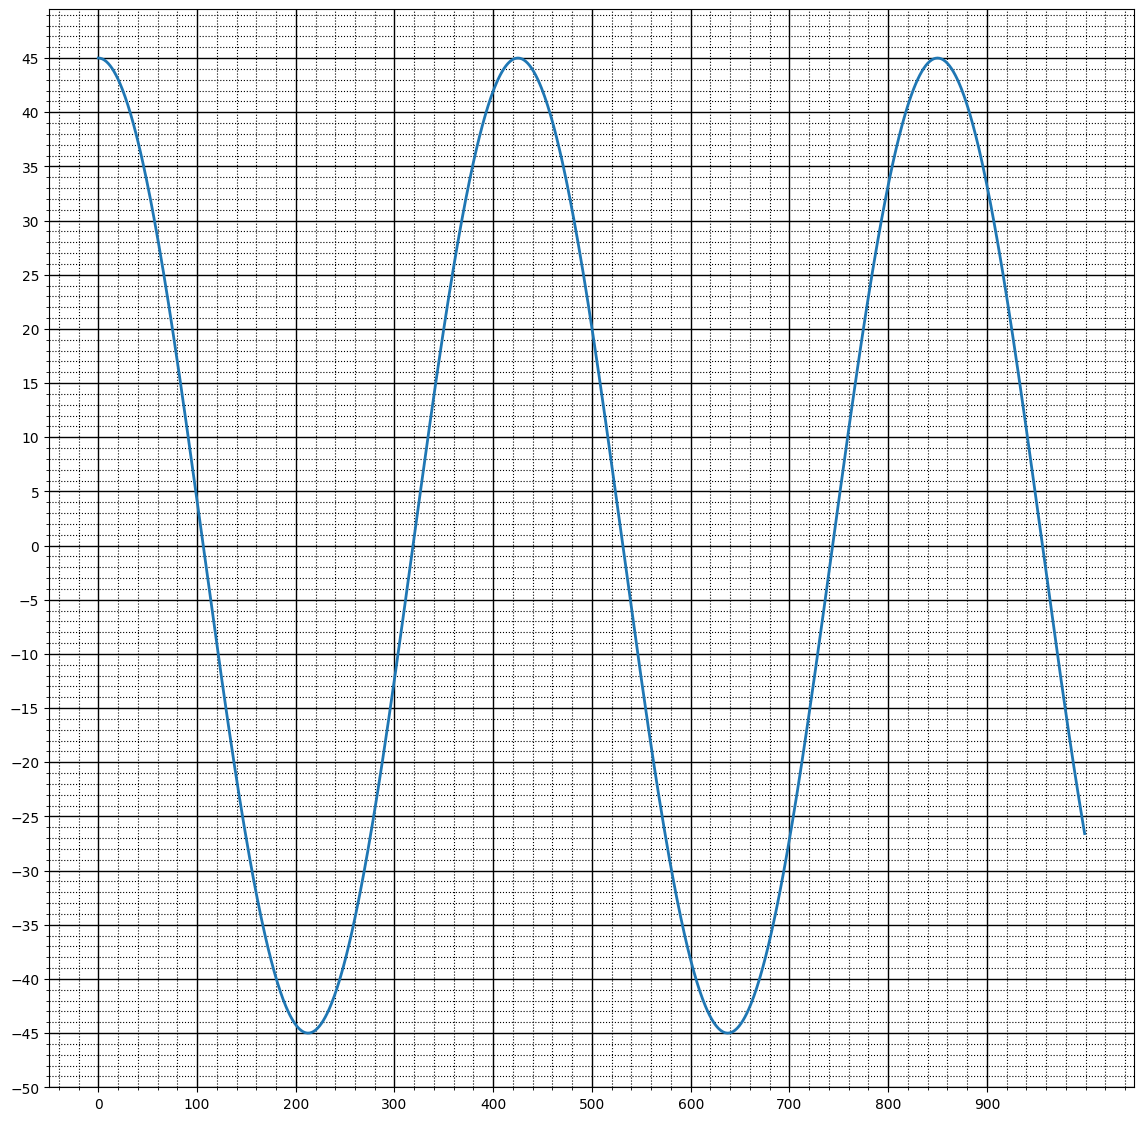

In [9]:
draw_signal(test_data['task2']['a'])

In [7]:
def generate_signal(amplitude, frequency, phase, n_samples=1000):
    t = np.arange(n_samples)
    phase_rad = np.deg2rad(phase)
    signal = amplitude * np.sin(2 *np.pi * frequency * t / n_samples + phase_rad)
    return signal

a = generate_signal(45, 2.35, 90)

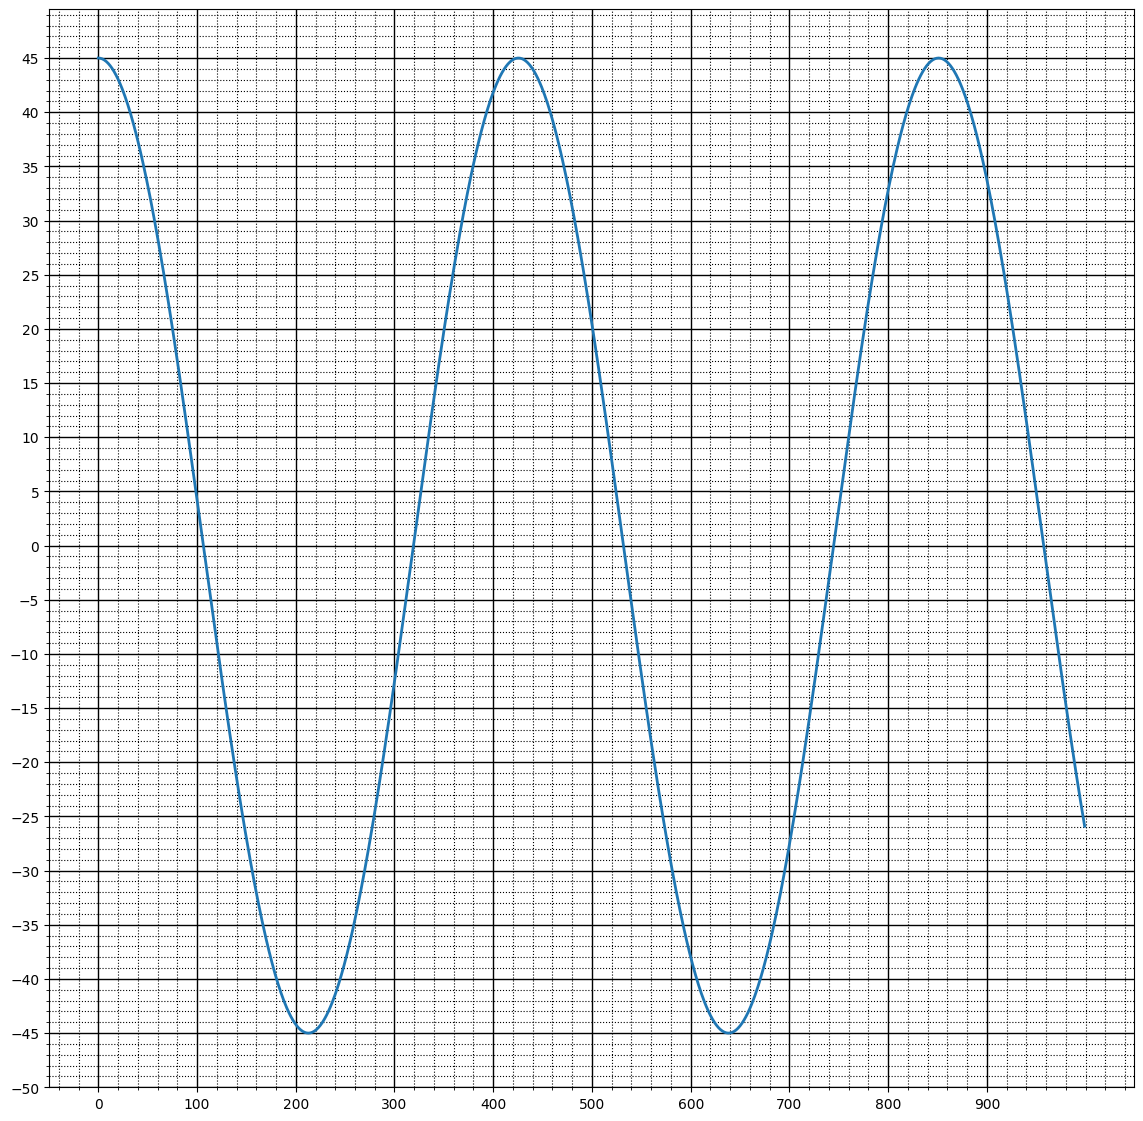

In [11]:
draw_signal(a)

In [12]:
assert len(a) == 1000
assert np.allclose(a, test_data["task2"]["a"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'a':**

1. Амплитуда - $A= 45$

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = 0.0148 рад/отсчет $

3. Фаза - $\phi=  π/2   радиан $

### Сигнал ***b***

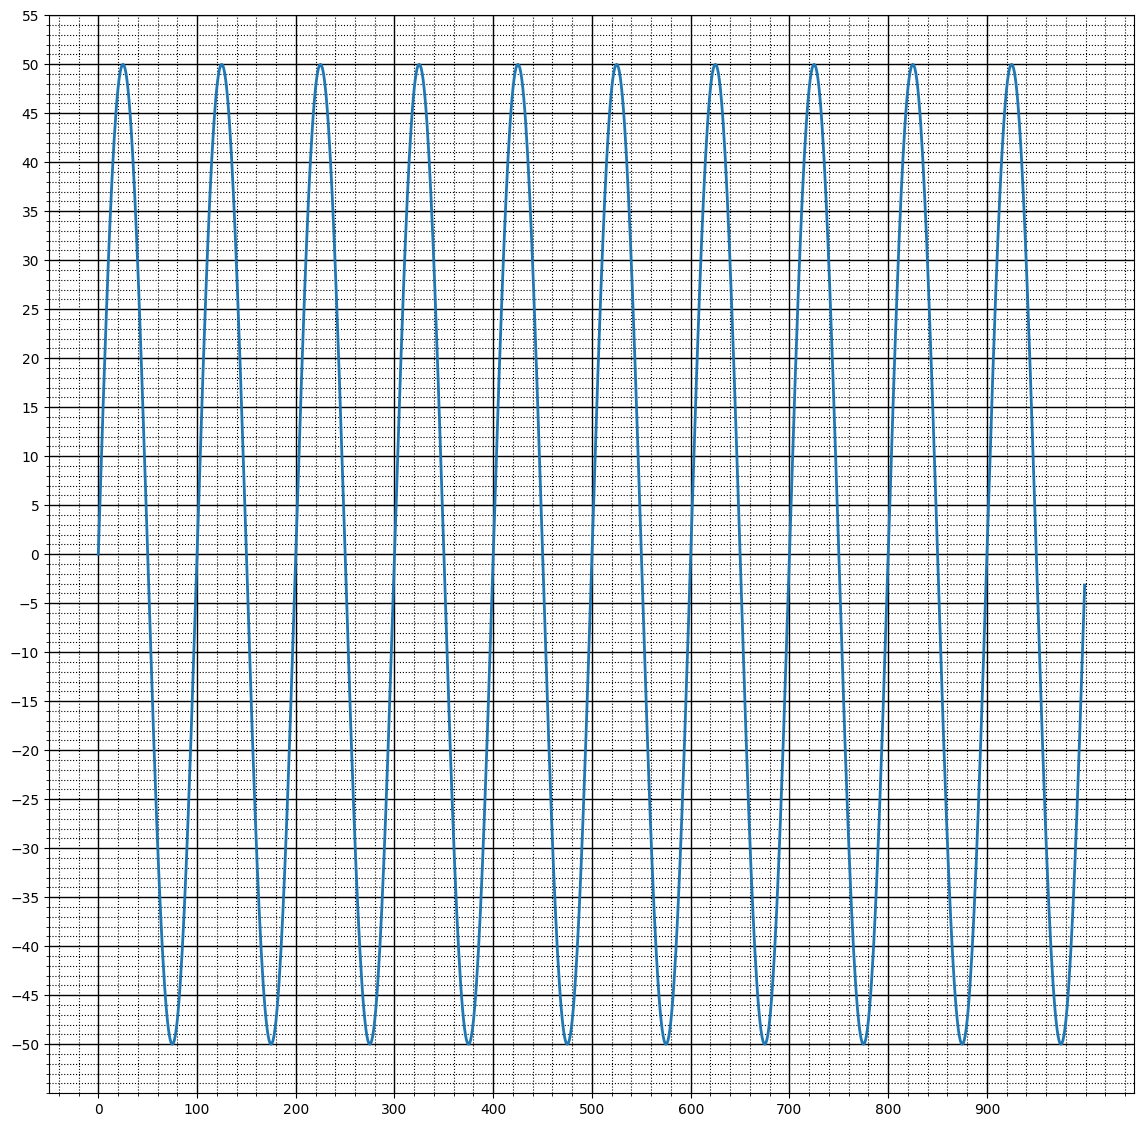

In [13]:
draw_signal(test_data['task2']['b'])

In [14]:
# YOUR CODE HERE
b = generate_signal(50, 10, 0)

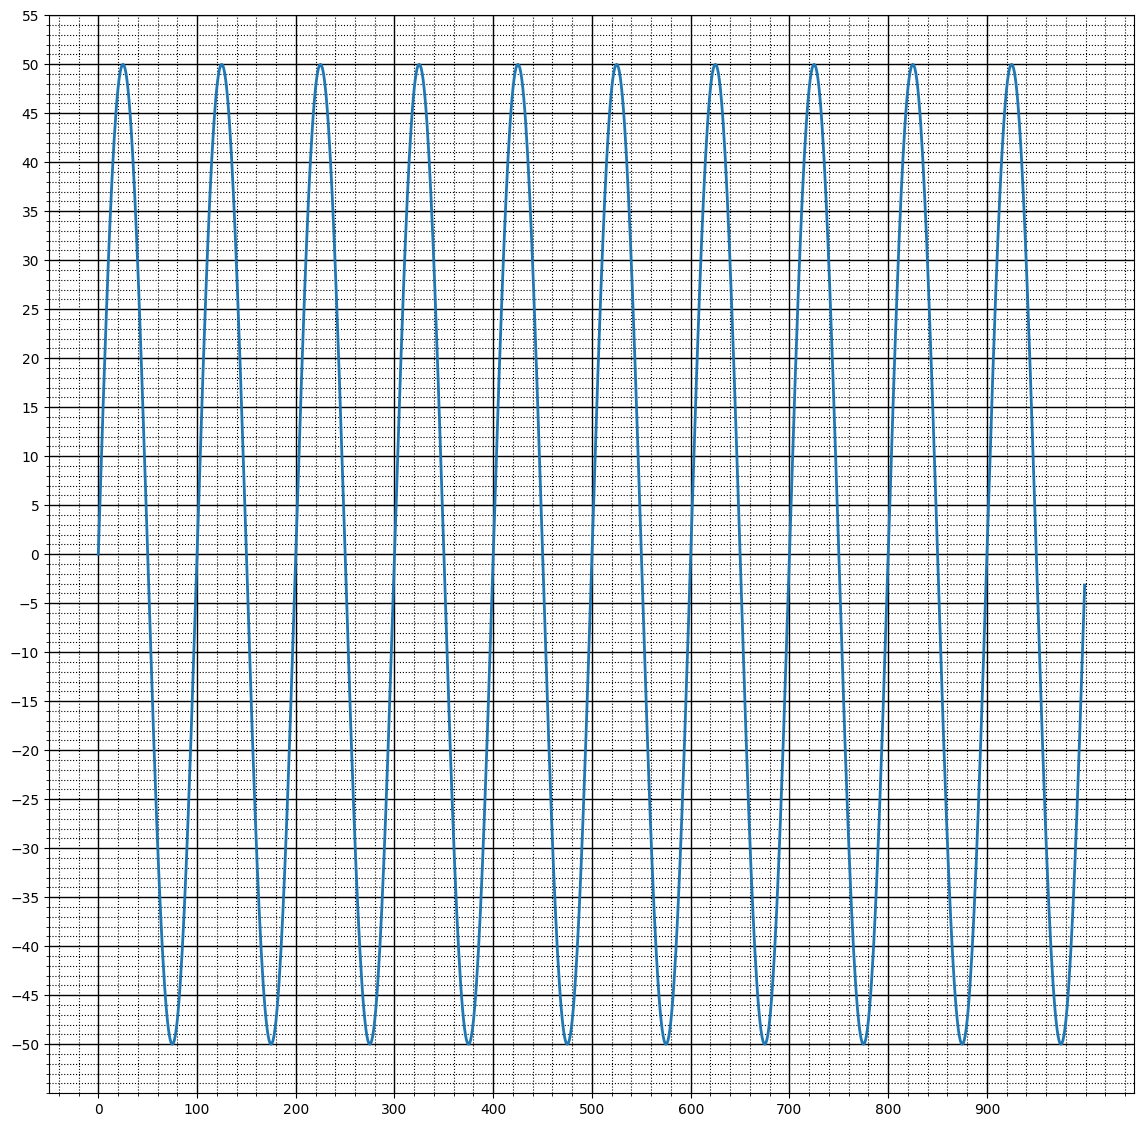

In [15]:
draw_signal(b)

In [16]:
assert len(b)== 1000
assert np.allclose(b, test_data["task2"]["b"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'b':**

1. Амплитуда - $A= 50$

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = 10$

3. Фаза - $\phi= $

### Сигнал ***c***

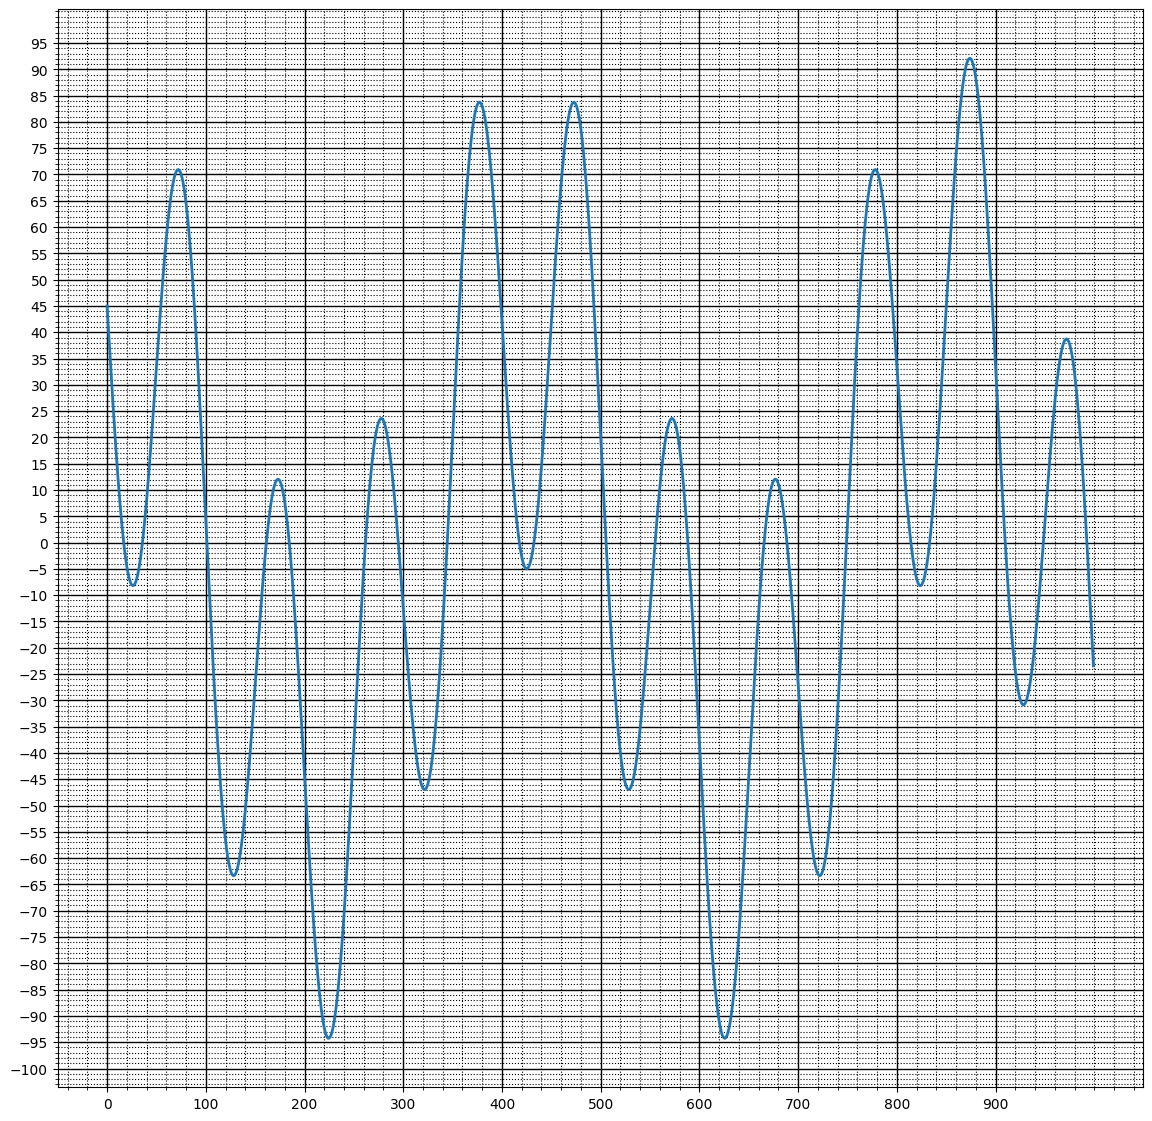

In [17]:
draw_signal(test_data['task2']['c'])

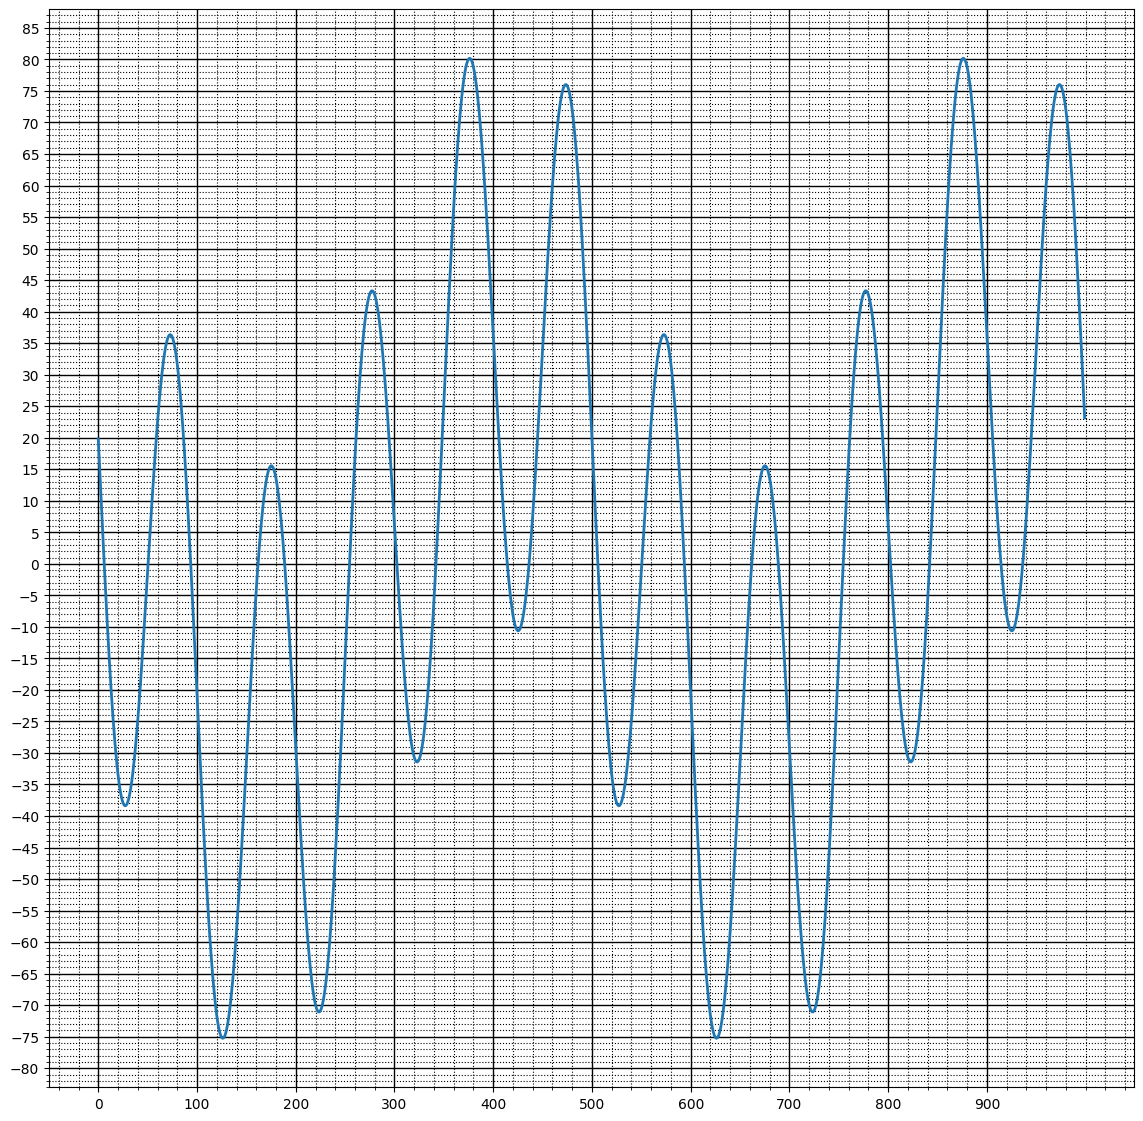

In [50]:
# сигнал состоит из двух гармоник
# я не смог найти гармоники, перебрал все возможные варианты. Лучший вариант представлен ниже:
c = (2.4651 + 
     generate_signal(47.5711, 10, 180) + 
     generate_signal(34.6711, 2, 150))
draw_signal(c)

In [41]:
assert len(c)== 1000
assert np.allclose(c, test_data["task2"]["c"], atol=1)
print("Ok!")

AssertionError: 

# Задание 3. Свертка (3 балла)

## Теория
Одна из наиболее частых операций, которая выполняется при обработке сигналов, это свёртка. Свёртка имеет много различных применений, например, с ее помощью можно убрать из сигнала шумы или применить к сигналу эффект эхо.


Свёртка — это математическая операция, применённая к двум функциям f и g и порождающая третью функцию. Операцию свёртки можно интерпретировать как «схожесть» одной функции с отражённой и сдвинутой копией другой.  Другими словами, преобразование свёртки однозначно определяет выходной сигнал y(t) для установленного значения входного сигнала x(t) при известном значении функции импульсного отклика системы h(t).

<!-- ![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution") -->
![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution")

Формула свёртки:
$$y_t=\frac{1}{2} \int_0^T x(\tau)h(t-τ)dτ$$
где $\tau$  - длительность импульсной переходной характеристики.

## Практика
Реализуйте операцию свёртки. Сравните её с существующей реализацией scipy.signal.convolve. Постройте графики фильтра, исходного сигнала и результата свертки.

In [63]:
def convolve(in1, in2):
    len_result = len(in1) + len(in2) - 1
    result = np.zeros(len_result)
    in2_flipped = np.flip(in2)
    in1_padded = np.concatenate([np.zeros(len(in2) - 1), in1, np.zeros(len(in2) - 1)])
    for i in range(len_result):
        result[i] = np.sum(in1_padded[i:i + len(in2)] * in2_flipped)
    return result

In [ ]:
def colvolve(in1, in2):
    len_result = len(in1) + len(in2) - 1
    result = np.zeros(len_result)
    in2_flipped = np.flip()

In [59]:
def test_convolve(a, b, print_debug=False):
    my_result = convolve(a, b)
    scipy_result = scipy.signal.convolve(a, b, method='direct')
    if print_debug:
        print(f"Your result {my_result}")
        print(f"Scipy result {scipy_result}")
    assert np.allclose(my_result, scipy_result), f"Test {a} conv {b} failed"
    print("Ok!")

In [68]:
a = np.repeat([0,1,0], 10)
b = np.array([0,1,2,3,2,1,0])

In [69]:
test_convolve(a, b, print_debug=False)

Ok!


### Нарисуйте результат свертки a и b

Сигнал **а**

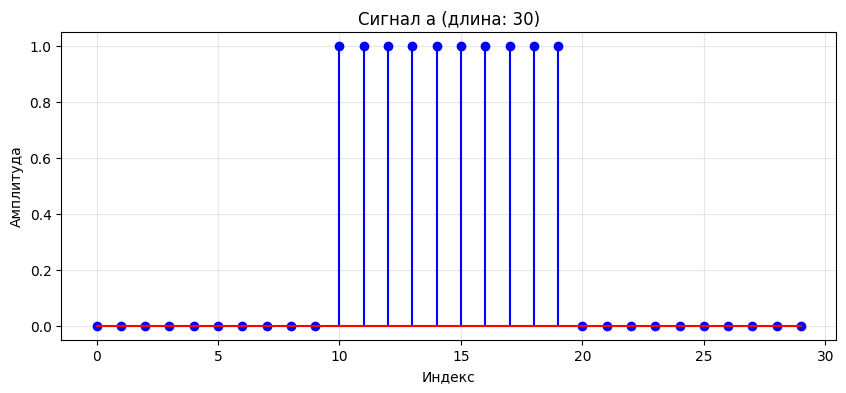

In [77]:
plt.figure(figsize=(10, 4))
plt.stem(a, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.title('Сигнал a (длина: {})'.format(len(a)))
plt.xlabel('Индекс')
plt.ylabel('Амплитуда')
plt.grid(True, alpha=0.3)

Сигнал **b**

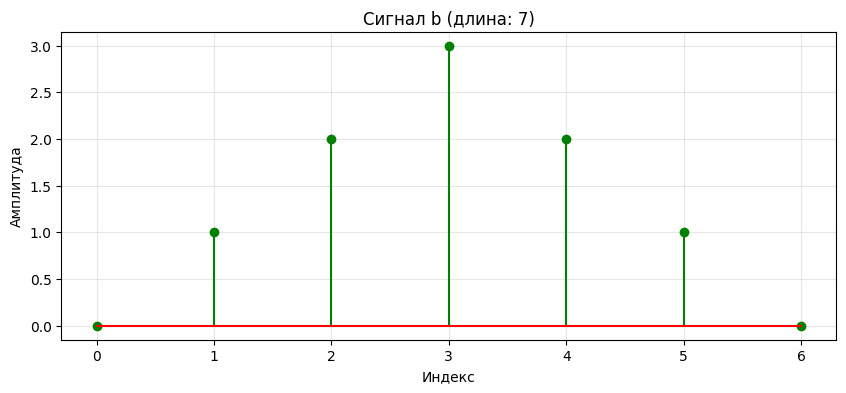

In [81]:
plt.figure(figsize=(10, 4))
plt.stem(b, linefmt='g-', markerfmt='go', basefmt='r-')
plt.title('Сигнал b (длина: {})'.format(len(b)))
plt.xlabel('Индекс')
plt.ylabel('Амплитуда')
plt.grid(True, alpha=0.3)

Свертка **a** и **b**

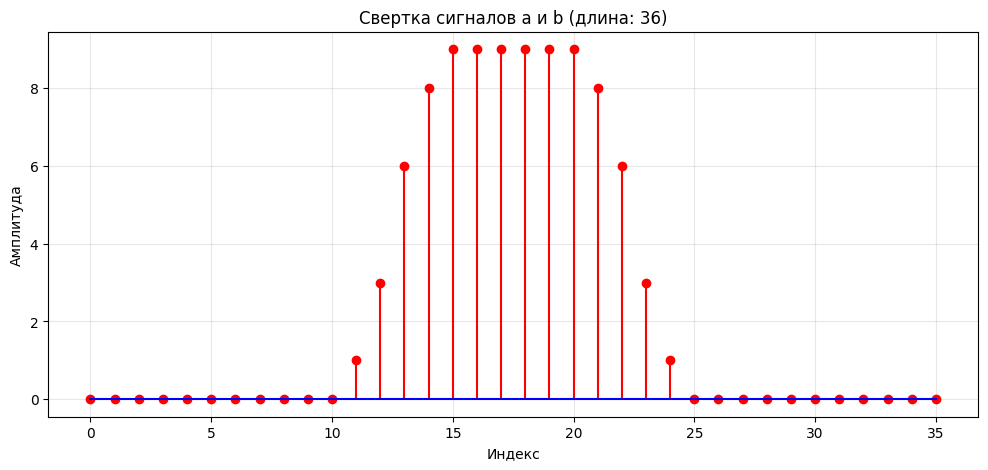

In [84]:
c = convolve(a, b)
plt.figure(figsize=(12, 5))
plt.stem(c, linefmt='r-', markerfmt='ro', basefmt='b-')
plt.title('Свертка сигналов a и b (длина: {})'.format(len(c)))
plt.xlabel('Индекс')
plt.ylabel('Амплитуда')
plt.grid(True, alpha=0.3)

Все 3 графика на одной картинке:

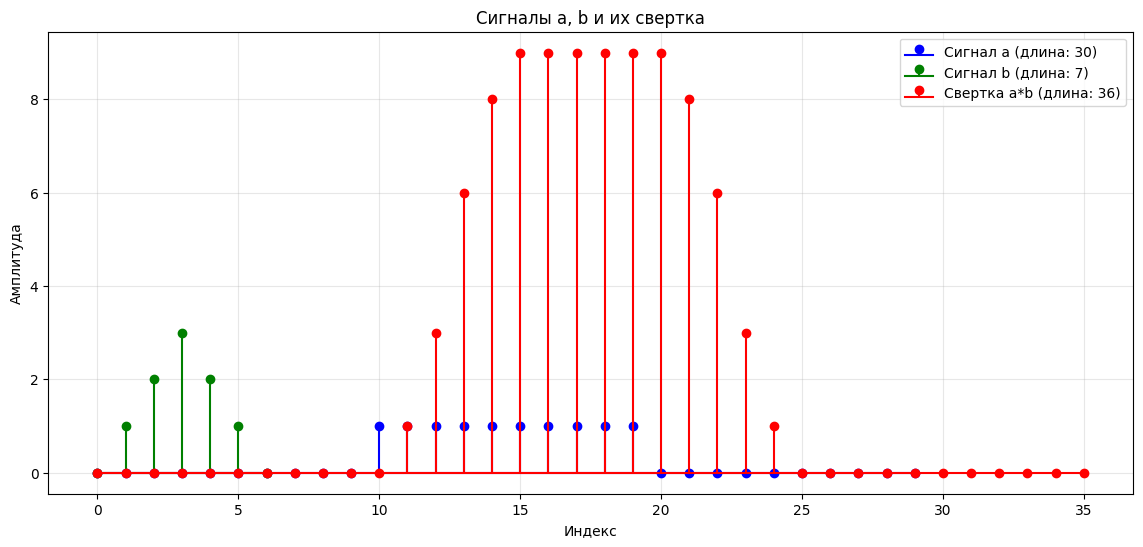

In [86]:
plt.figure(figsize=(14, 6))

plt.stem(np.arange(len(a)), a, linefmt='b-', markerfmt='bo', 
         basefmt='b-', label='Сигнал a (длина: {})'.format(len(a)))
plt.stem(np.arange(len(b)), b, linefmt='g-', markerfmt='go', 
         basefmt='g-', label='Сигнал b (длина: {})'.format(len(b)))
plt.stem(np.arange(len(c)), c, linefmt='r-', markerfmt='ro', 
         basefmt='r-', label='Свертка a*b (длина: {})'.format(len(c)))

plt.title('Сигналы a, b и их свертка')
plt.xlabel('Индекс')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True, alpha=0.3)

# Задание 4. * Алгоритм Карплуса-Стронга 

Реализуйте  [Алгоритм Карплуса-Стронга](https://en.wikipedia.org/wiki/Karplus%E2%80%93Strong_string_synthesis). В качестве фильтра используйте усреднитель двух смежных отсчетов. Проверьте результат. 

Отрисуйте и воспроизведите полученный сигнал. На что влияют параметры генерации? Попробуйте имитировать звучание разных струн гитары.

In [ ]:
def karplus_strong(noise, N):
    # Noise - input
    # N - number of samples to generate
    # return y - generated signal based on Noise 
    # YOUR CODE HERE

   

    raise NotImplementedError()

In [ ]:
np.random.seed(seed=1)
sample_rate = 44100 
frequency = 82.41
sec = 2
gen_len = sample_rate * sec
noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency))) # [-1, 1]

gen_wav = karplus_strong(noise, gen_len)
assert np.allclose(gen_wav[:len(noise)], noise), "Generated signal must starting with noise"
assert np.allclose(gen_wav[len(noise)], (noise[0])/2), "Out of range samples eq 0."
assert np.allclose(gen_wav[len(noise)+1: 2*len(noise)], (noise[:-1] + noise[1:])/2), \
    "Bad requrent rule( 1 iteration)"
assert np.allclose(gen_wav[2*len(noise)], (noise[0]/2 + noise[-1])/2), \
    "Bad requrent rule( 2 iteration)"
assert np.allclose(gen_wav[2*len(noise)+2: 3*len(noise)], \
                   (((noise[:-1] + noise[1:])/2)[:-1] + ((noise[:-1] + noise[1:])/2)[1:])/2), \
    "Bad requrent rule( 3 iteration)"
print('All Ok!')

### Попробуем покрутить параметры генерации

Сгенерируем гитарные ноты:

In [ ]:
# YOUR CODE HERE

Визуализируем затухание амплитуды:

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, gen_len)
plt.plot(np.linspace(0, gen_len+1, gen_len), gen_wav)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()

Визуализируйте затухание амплитуд гитарных нот:

In [ ]:
# YOUR CODE HERE